Import librarys 

In [1]:
# organize imports
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import numpy as np
import pickle
import h5py
import os
import json
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

Parameters of configuration

In [43]:
# config variables
test_size = 0.10
seed = 8
val_path = "H:/Output2/test"
features_path = "H:/Output2/meta/features.h5"
labels_path = "H:/Output2/meta/labels.h5"
results = "H:/Output2/meta/results.txt"
classifier_path = "classifier.cpickle"
train_path = "H:/Output2/training"
num_classes = 101

Val_features_path= "H:/Output2/meta/valfeatures.h5"
Val_Labels_path = "H:/Output2/meta/vallabels.h5"

Import features

In [9]:
%%time
# import features and labels for training
h5f_data = h5py.File(features_path, 'r')
h5f_label = h5py.File(labels_path, 'r')

# import features and labels for Validation
h5f_val_data = h5py.File(Val_features_path, 'r')
h5f_val_label = h5py.File(Val_Labels_path, 'r')



Wall time: 0 ns


Save features in temporary registers

In [10]:
%%time
features_string = h5f_data['dataset_1']
labels_string = h5f_label['dataset_1']

Val_features_string = h5f_val_data['dataset_1']
Val_labels_string = h5f_val_label['dataset_1']


Wall time: 0 ns


In [11]:
%%time
features = np.array(features_string)
labels = np.array(labels_string)
valfeatures = np.array(Val_features_string)
vallabels = np.array(Val_labels_string)


h5f_data.close()
h5f_label.close()


h5f_val_data.close()
h5f_val_label.close()

Wall time: 714 ms


print features shape

In [13]:
%%time
# verify the shape of features and labels
print ("[INFO] features shape:", features.shape)
print ("[INFO] labels shape: {}",labels.shape)

print ("[INFO] training started...")
# split the training and testing data
#(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(features),
#                                                                  np.array(labels),
#                                                                  test_size=test_size,
#                                                                  random_state=seed)

trainData = features
trainLabels = labels
testData = valfeatures
testLabels = vallabels

[INFO] features shape: (80800, 2048)
[INFO] labels shape: {} (80800,)
[INFO] training started...
Wall time: 697 ms


In [14]:
%%time
print ("[INFO] splitted train and test data...")
print ("[INFO] train data  : {}",trainData.shape)
print ("[INFO] test data   : {}",testData.shape)
print ("[INFO] train labels: {}",trainLabels.shape)
print ("[INFO] test labels : {}",testLabels.shape)

[INFO] splitted train and test data...
[INFO] train data  : {} (72720, 2048)
[INFO] test data   : {} (8080, 2048)
[INFO] train labels: {} (72720,)
[INFO] test labels : {} (8080,)
Wall time: 0 ns


Modelo com sklearn

Load the model and train it

In [15]:
%%time
# use logistic regression as the model
print("[INFO] creating model...")
model = LogisticRegression(random_state=seed)
model.fit(trainData, trainLabels)

[INFO] creating model...
Wall time: 3h 5min 47s


Insert new variables to store the quantity of matchs

In [57]:
# use rank-1 and rank-5 predictions
print("[INFO] evaluating model...")
f = open(results, "w")
rank_1 = 0
rank_5 = 0

[INFO] evaluating model...


Start to predict the validate or test dataset

In [62]:
# loop over test data
Perc = 0
acertos =0
total =0
for (label, features) in zip(vallabels, valfeatures):
    # predict the probability of each class label and
    # take the top-5 class labels
    predictions = model.predict_proba(np.atleast_2d(features))[0]
    predictions = np.argsort(predictions)[::-1][:5]

#    import csv   
#    fields=[str(category_index), category,str(first_index), human_string]
#    with open(results_file_path, 'a+') as f:
#        writer = csv.writer(f)
#        writer.writerow(fields)
#        f.close()
    
    print(label, predictions[0])
    # rank-1 prediction increment
    if label == predictions[0]:
        rank_1 += 1
        acertos += 1

    # rank-5 prediction increment
    if label in predictions:
        rank_5 += 1
    total +=1
    

Perc = acertos/total

0 22
0 57
0 42
0 100
0 53
0 0
0 29
0 62
0 8
0 0
0 85
0 0
0 97
0 100
0 0
0 0
0 74
0 2
0 0
0 31
0 34
0 47
0 0
0 0
0 0
0 0
0 86
0 0
0 0
0 62
0 8
0 36
0 17
0 72
0 68
0 0
0 1
0 49
0 31
0 17
0 17
0 72
0 52
0 0
0 67
0 6
0 2
0 0
0 93
0 0
0 0
0 89
0 0
0 2
0 0
0 0
0 41
0 53
0 9
0 0
0 67
0 39
0 73
0 82
0 0
0 67
0 8
0 72
0 52
0 0
0 0
0 0
0 0
0 11
0 67
0 6
0 8
0 5
0 61
0 0
0 0
0 46
0 8
0 8
0 29
0 94
0 0
0 72
0 0
0 0
0 0
0 95
0 98
0 72
0 82
0 46
0 78
0 0
0 62
0 0
0 0
0 8
0 0
0 0
0 86
0 0
0 34
0 0
0 22
0 79
0 98
0 0
0 8
0 0
0 56
0 94
0 0
0 8
0 62
0 10
0 42
0 17
0 0
0 0
0 79
0 0
0 0
0 0
0 0
0 6
0 8
0 0
0 9
0 38
0 8
0 0
0 41
0 58
0 25
0 0
0 0
0 0
0 0
0 100
0 17
0 0
0 0
0 17
0 18
0 0
0 21
0 95
0 16
0 0
0 38
0 49
0 74
0 49
0 0
0 8
0 0
0 8
0 0
0 3
0 0
0 10
0 85
0 0
0 37
0 4
0 0
0 0
0 67
0 85
0 0
0 29
0 55
0 0
0 0
0 0
0 0
0 0
0 8
0 34
0 7
0 8
0 0
0 0
0 29
0 0
0 8
0 3
0 0
0 57
0 0
0 0
0 0
0 39
0 0
0 100
1 79
1 79
1 1
1 20
1 77
1 36
1 79
1 25
1 79
1 23
1 93
1 50
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 14
1 1
1 1
1 75


9 9
9 9
9 9
9 92
9 6
9 0
9 9
9 9
9 9
9 19
9 9
9 9
9 9
9 96
9 9
9 9
9 9
9 36
9 9
9 72
9 9
9 9
9 9
9 9
9 9
9 9
9 9
9 9
9 67
9 19
9 9
9 9
9 9
9 9
9 9
9 9
9 9
9 67
9 12
9 9
9 9
9 69
9 9
9 9
9 89
9 61
9 9
9 59
9 10
9 67
9 9
9 57
9 92
9 87
9 9
9 36
9 9
9 9
9 56
9 80
9 9
9 9
9 9
9 9
9 9
9 9
9 9
9 9
9 9
9 9
9 9
9 9
9 62
9 9
9 9
9 9
9 2
9 57
9 97
9 9
9 61
9 19
9 56
9 9
9 2
9 9
9 9
9 19
9 9
9 9
9 9
9 9
9 36
9 14
9 9
9 55
9 9
9 9
10 42
10 95
10 10
10 49
10 10
10 10
10 44
10 10
10 4
10 76
10 10
10 10
10 10
10 99
10 89
10 10
10 3
10 10
10 10
10 10
10 10
10 10
10 10
10 87
10 50
10 96
10 19
10 99
10 10
10 47
10 10
10 28
10 67
10 57
10 13
10 56
10 10
10 95
10 15
10 10
10 46
10 34
10 40
10 32
10 30
10 15
10 13
10 10
10 25
10 10
10 43
10 10
10 11
10 71
10 13
10 48
10 99
10 10
10 10
10 10
10 50
10 67
10 96
10 56
10 10
10 39
10 62
10 34
10 28
10 40
10 11
10 10
10 10
10 96
10 17
10 30
10 10
10 67
10 10
10 10
10 14
10 10
10 87
10 10
10 29
10 30
10 10
10 76
10 99
10 10
10 10
10 57
10 10
10 13
10 10
10 10
10 

18 18
18 56
18 81
18 87
18 18
18 18
18 18
18 18
18 57
18 66
18 41
18 18
18 18
18 56
18 81
18 18
18 42
18 15
18 59
18 48
18 18
18 18
18 18
18 85
18 54
18 18
18 87
18 18
18 18
18 18
18 82
18 11
18 78
18 18
18 46
18 60
18 18
18 4
18 18
18 56
18 71
18 89
18 18
18 18
18 18
18 18
18 60
18 18
18 22
18 47
18 97
18 18
18 18
18 89
18 18
18 18
18 18
18 24
18 44
18 18
18 18
18 82
18 18
18 18
18 18
18 18
18 18
18 18
18 18
18 72
18 44
18 18
18 69
18 18
18 81
18 96
18 18
18 18
18 8
18 18
18 18
18 79
18 18
18 20
18 78
18 15
18 18
18 96
18 22
18 18
18 18
18 18
18 10
18 55
18 48
18 18
18 54
18 80
18 18
18 18
18 1
18 18
18 50
18 74
18 18
18 27
18 18
18 84
18 15
18 18
18 18
18 75
18 15
18 18
18 18
18 18
18 18
18 18
18 97
18 18
18 18
18 19
18 18
18 18
18 47
18 18
18 18
18 18
18 48
18 18
18 89
18 18
18 20
18 18
19 11
19 19
19 19
19 19
19 19
19 19
19 59
19 19
19 19
19 19
19 19
19 56
19 19
19 96
19 19
19 66
19 15
19 9
19 19
19 19
19 19
19 19
19 19
19 19
19 19
19 52
19 56
19 15
19 19
19 15
19 1
19 19
19 19
19 

25 25
25 80
25 25
25 25
25 96
25 25
25 25
25 25
25 25
25 25
25 36
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 25
25 67
25 25
25 25
25 48
25 25
25 25
25 10
25 96
25 49
25 25
25 25
25 25
25 25
25 28
25 25
25 25
25 25
25 25
25 49
25 25
25 25
25 25
25 25
25 25
25 25
25 14
25 25
26 26
26 93
26 26
26 50
26 46
26 8
26 26
26 53
26 2
26 87
26 34
26 26
26 77
26 47
26 77
26 36
26 18
26 26
26 26
26 26
26 37
26 5
26 26
26 26
26 69
26 46
26 36
26 71
26 61
26 84
26 26
26 26
26 89
26 4
26 26
26 77
26 26
26 26
26 21
26 56
26 87
26 40
26 26
26 50
26 3
26 26
26 26
26 9
26 5
26 26
26 59
26 99
26 8
26 88
26 89
26 26
26 67
26 99
26 26
26 79
26 26
26 44
26 3
26 11
26 26
26 39
26 5
26 44
26 26
26 14
26 11
26 26
26 26
26 26
26 26
26 81
26 26
26 10
26 34
26 57
26 26
26 26
26 50
26 10
26 26
26 26
26 26
26 26
26 56
26 5
26 14
26 0
26 67
26 26
26 95
26 26
26 50
26 1
26 26
26 26
26 70
26 26
26 50
26 26
26 56
26 97
26 70
26 36
26 37
26 26
26 26
26 26
26 95
26 8
26 34
26 36
26 26
26 36
26 38
26 87


34 34
34 34
34 4
34 34
34 34
34 73
34 34
34 34
34 34
34 34
34 34
34 34
34 34
34 28
34 34
34 34
34 79
34 34
34 34
34 34
34 10
34 34
34 34
34 34
34 34
34 56
34 34
34 34
34 34
34 34
34 13
34 34
34 34
34 34
34 51
34 34
34 34
34 34
34 34
34 34
34 41
34 16
34 34
34 34
34 34
34 34
34 34
34 85
34 34
34 34
34 34
34 67
34 34
34 34
34 34
34 34
34 99
34 59
34 34
34 34
34 86
34 34
34 34
34 34
34 34
34 34
34 34
34 34
34 34
34 34
34 10
34 34
34 82
34 56
34 34
34 71
34 34
34 8
34 34
34 34
34 34
34 34
34 34
34 34
34 34
34 34
34 34
34 34
35 35
35 35
35 35
35 18
35 35
35 35
35 57
35 35
35 35
35 69
35 31
35 62
35 34
35 42
35 81
35 35
35 46
35 35
35 35
35 35
35 35
35 35
35 35
35 35
35 35
35 35
35 5
35 56
35 35
35 35
35 35
35 35
35 35
35 35
35 35
35 71
35 84
35 35
35 65
35 35
35 60
35 30
35 35
35 35
35 35
35 72
35 35
35 35
35 47
35 41
35 35
35 35
35 35
35 35
35 35
35 35
35 35
35 98
35 22
35 35
35 66
35 87
35 21
35 26
35 35
35 35
35 35
35 35
35 81
35 35
35 35
35 35
35 17
35 35
35 35
35 35
35 35
35 76
35 35
3

43 43
43 34
43 43
43 43
43 43
43 79
43 43
43 44
43 43
43 43
43 43
43 68
43 43
43 31
43 71
43 56
43 11
43 68
43 51
43 18
43 43
43 51
43 99
43 43
43 43
43 67
43 43
43 43
43 43
43 79
43 43
43 15
43 43
43 43
43 43
43 43
43 43
43 71
43 43
43 96
43 43
43 43
43 62
43 43
43 44
43 43
43 43
43 43
43 43
43 100
43 43
43 43
43 15
43 43
43 43
43 40
43 43
43 43
43 43
43 43
43 43
43 18
43 43
43 26
43 43
43 68
43 43
43 43
43 43
43 51
43 43
43 66
43 43
43 62
43 68
43 43
43 43
43 43
43 68
43 68
43 43
43 71
43 43
43 43
43 68
43 43
43 43
43 71
43 43
43 43
43 71
43 43
43 77
43 43
43 43
43 85
43 40
43 43
43 43
43 5
43 43
43 43
43 79
43 88
43 36
43 43
43 16
43 90
43 43
43 43
43 43
43 38
43 68
43 43
43 30
43 89
43 43
43 43
43 43
43 43
43 43
43 43
43 43
43 43
43 43
43 43
43 15
43 43
43 43
43 66
43 43
43 43
43 43
43 43
43 43
43 43
43 43
43 21
43 43
43 68
43 43
43 43
43 43
43 43
43 43
43 43
43 43
43 43
43 71
43 43
43 73
43 43
43 43
43 89
43 43
43 43
43 43
43 43
43 78
43 43
43 43
44 44
44 44
44 84
44 44
44 43
44 4

51 51
51 51
51 51
51 51
51 51
51 51
51 51
51 51
51 51
51 51
51 51
51 51
51 51
51 51
51 51
51 51
51 51
51 51
51 51
51 51
51 51
51 15
51 51
51 38
51 40
51 51
51 31
51 4
51 11
51 85
51 57
51 20
51 51
51 51
51 17
52 52
52 85
52 77
52 16
52 67
52 52
52 32
52 52
52 96
52 52
52 97
52 52
52 52
52 48
52 32
52 20
52 51
52 52
52 52
52 95
52 52
52 52
52 52
52 0
52 62
52 52
52 6
52 49
52 52
52 52
52 52
52 52
52 52
52 52
52 82
52 52
52 52
52 52
52 52
52 52
52 92
52 52
52 87
52 95
52 92
52 20
52 52
52 52
52 49
52 52
52 52
52 96
52 52
52 85
52 52
52 52
52 32
52 52
52 86
52 85
52 52
52 32
52 52
52 52
52 10
52 92
52 52
52 52
52 52
52 52
52 85
52 57
52 52
52 20
52 20
52 52
52 52
52 30
52 84
52 52
52 52
52 52
52 52
52 52
52 92
52 52
52 52
52 52
52 52
52 52
52 52
52 52
52 52
52 52
52 52
52 52
52 52
52 52
52 52
52 77
52 52
52 52
52 52
52 52
52 52
52 52
52 52
52 52
52 42
52 46
52 52
52 16
52 49
52 52
52 52
52 58
52 52
52 52
52 52
52 52
52 52
52 52
52 95
52 52
52 52
52 87
52 62
52 26
52 52
52 52
52 52
52 32
5

60 60
60 22
60 60
60 60
60 60
60 60
60 60
60 60
60 60
60 60
60 24
60 24
60 24
60 60
60 60
60 60
60 60
60 24
60 60
60 60
60 24
60 60
60 60
60 60
60 60
60 60
60 60
60 22
60 60
60 60
60 60
60 60
60 60
60 60
60 60
60 60
60 60
60 60
60 60
60 60
60 60
60 60
60 60
60 60
60 60
60 24
60 60
60 60
60 60
60 60
60 24
60 60
60 60
60 60
60 60
60 64
60 60
60 98
60 60
60 15
60 98
60 60
60 60
60 60
60 60
60 24
60 64
60 68
60 60
60 60
60 82
60 60
60 0
60 18
60 60
60 60
60 60
60 18
60 60
60 60
60 60
60 60
60 24
60 18
60 60
60 98
60 60
60 24
60 60
60 88
60 60
60 60
60 60
60 60
60 60
61 61
61 3
61 61
61 61
61 61
61 25
61 61
61 96
61 61
61 61
61 61
61 61
61 61
61 89
61 80
61 15
61 38
61 11
61 61
61 61
61 20
61 49
61 97
61 61
61 20
61 61
61 61
61 61
61 61
61 61
61 61
61 61
61 61
61 61
61 38
61 61
61 61
61 26
61 61
61 49
61 61
61 61
61 80
61 61
61 61
61 42
61 9
61 61
61 61
61 38
61 61
61 61
61 61
61 61
61 61
61 15
61 36
61 61
61 40
61 28
61 61
61 96
61 61
61 55
61 10
61 61
61 61
61 61
61 61
61 61
61 61
61 61
6

68 68
68 68
68 68
68 68
68 68
68 68
68 68
68 68
68 68
68 68
68 68
68 68
68 68
68 68
68 68
68 68
68 68
68 43
68 68
68 68
68 43
68 70
68 68
68 68
68 68
68 31
68 68
68 68
68 68
68 68
68 23
68 68
68 68
68 68
68 68
68 43
68 68
68 68
68 18
68 68
68 68
68 68
68 68
68 68
68 80
68 68
68 53
68 68
68 68
68 68
68 91
68 68
68 68
68 68
68 68
68 68
68 68
68 68
68 68
68 68
69 69
69 69
69 69
69 96
69 69
69 32
69 14
69 69
69 69
69 69
69 69
69 69
69 69
69 43
69 69
69 69
69 69
69 69
69 69
69 69
69 69
69 35
69 15
69 96
69 69
69 58
69 67
69 69
69 28
69 68
69 69
69 69
69 69
69 66
69 69
69 69
69 69
69 69
69 62
69 69
69 69
69 69
69 69
69 34
69 69
69 69
69 15
69 69
69 69
69 69
69 79
69 69
69 69
69 69
69 69
69 69
69 65
69 69
69 69
69 69
69 69
69 69
69 69
69 69
69 69
69 42
69 69
69 41
69 69
69 69
69 69
69 69
69 69
69 56
69 69
69 69
69 69
69 69
69 69
69 69
69 69
69 69
69 69
69 69
69 69
69 69
69 69
69 39
69 24
69 69
69 69
69 69
69 69
69 69
69 69
69 69
69 69
69 69
69 35
69 69
69 69
69 35
69 69
69 69
69 69
69 69
69 6

76 76
76 19
76 76
76 76
76 76
76 76
76 76
76 76
76 76
76 76
76 76
76 76
76 76
76 76
76 76
76 46
76 76
76 76
76 76
76 13
76 76
76 76
76 76
76 76
76 76
76 0
76 67
76 76
76 76
76 76
76 76
76 76
76 62
76 76
76 76
76 67
76 56
76 98
76 19
76 76
76 76
76 76
76 76
76 76
76 76
76 76
76 76
76 76
76 76
76 76
76 76
76 76
76 76
76 76
76 76
76 76
76 76
76 76
76 76
76 13
76 76
76 76
76 76
76 76
76 76
76 76
76 76
76 76
76 76
76 35
76 55
76 76
76 76
76 76
76 76
76 76
76 76
76 52
76 76
76 76
76 46
76 76
76 76
76 76
76 76
76 76
76 76
76 76
76 76
76 69
76 10
76 76
76 76
76 76
76 76
77 1
77 38
77 77
77 96
77 20
77 93
77 50
77 77
77 77
77 5
77 10
77 93
77 50
77 37
77 77
77 42
77 77
77 77
77 20
77 82
77 77
77 59
77 93
77 93
77 89
77 28
77 75
77 1
77 97
77 49
77 66
77 1
77 77
77 93
77 77
77 1
77 77
77 2
77 81
77 77
77 53
77 41
77 4
77 37
77 77
77 77
77 93
77 50
77 26
77 77
77 47
77 79
77 77
77 61
77 77
77 82
77 47
77 26
77 93
77 77
77 74
77 79
77 20
77 82
77 77
77 26
77 59
77 87
77 3
77 99
77 93
77 77
77 37
7

84 84
84 84
84 84
84 84
84 47
84 91
84 84
84 84
84 24
84 84
84 84
84 84
84 84
84 13
84 8
84 13
84 84
84 47
84 82
84 47
84 62
84 84
84 82
84 84
84 84
84 84
84 88
84 73
84 56
84 44
84 56
84 84
84 98
84 84
84 84
84 84
84 46
84 44
84 84
84 84
84 84
84 84
84 84
84 84
84 56
84 62
84 4
84 71
84 84
84 84
84 51
84 84
84 89
84 41
84 84
84 51
84 71
84 84
84 84
84 82
84 84
84 77
84 99
84 84
84 84
84 59
84 62
84 84
84 91
84 84
84 84
84 35
84 77
84 26
84 84
84 82
84 84
84 84
84 84
84 66
84 84
84 84
84 3
84 84
84 84
84 84
84 44
84 84
84 61
84 24
84 84
84 84
84 62
84 15
84 84
84 84
84 90
84 84
84 27
84 71
84 3
84 84
84 89
84 8
84 62
84 71
84 84
84 51
84 84
84 84
85 85
85 4
85 85
85 85
85 85
85 85
85 85
85 85
85 57
85 2
85 85
85 85
85 9
85 85
85 85
85 8
85 85
85 85
85 85
85 85
85 85
85 85
85 85
85 85
85 85
85 92
85 85
85 85
85 85
85 85
85 85
85 85
85 85
85 85
85 85
85 85
85 85
85 85
85 71
85 2
85 57
85 85
85 85
85 85
85 85
85 85
85 79
85 85
85 85
85 38
85 32
85 85
85 85
85 2
85 85
85 85
85 97
85 77
85 

92 92
92 86
92 92
92 92
92 92
92 92
92 92
92 92
92 9
92 92
92 92
92 92
92 92
92 92
92 96
92 86
92 92
92 92
92 92
92 92
92 5
92 92
92 92
92 92
92 92
92 92
92 92
92 92
92 92
92 92
92 92
92 92
92 97
92 66
92 92
92 92
92 92
92 23
92 97
92 92
92 92
92 38
92 92
92 15
92 74
92 92
92 5
92 93
92 9
92 92
92 92
92 92
92 25
93 98
93 93
93 93
93 0
93 50
93 77
93 36
93 93
93 77
93 77
93 77
93 77
93 93
93 93
93 77
93 79
93 74
93 37
93 93
93 67
93 81
93 90
93 93
93 93
93 79
93 38
93 4
93 21
93 93
93 5
93 93
93 20
93 1
93 69
93 14
93 20
93 93
93 79
93 93
93 18
93 37
93 39
93 37
93 93
93 1
93 1
93 93
93 37
93 38
93 93
93 74
93 37
93 93
93 93
93 69
93 93
93 77
93 71
93 26
93 77
93 13
93 37
93 77
93 85
93 8
93 1
93 79
93 1
93 37
93 50
93 77
93 93
93 42
93 4
93 37
93 37
93 93
93 44
93 20
93 50
93 50
93 1
93 12
93 42
93 93
93 20
93 89
93 4
93 37
93 93
93 93
93 93
93 37
93 93
93 16
93 93
93 46
93 37
93 79
93 37
93 77
93 38
93 77
93 93
93 77
93 93
93 93
93 93
93 93
93 93
93 93
93 37
93 93
93 93
93 93
93 93
93

99 95
99 99
99 99
99 5
99 8
99 99
99 13
99 4
99 16
99 4
99 15
99 5
99 13
99 36
99 4
99 5
99 21
99 26
99 18
99 99
99 99
99 97
99 22
99 10
99 5
99 57
99 99
99 99
99 4
99 85
99 4
99 26
99 39
99 3
99 57
99 14
99 99
99 87
99 99
99 26
99 99
99 87
99 51
99 93
99 33
99 88
99 4
99 4
99 3
100 6
100 100
100 100
100 100
100 78
100 100
100 100
100 100
100 53
100 100
100 100
100 100
100 100
100 10
100 34
100 100
100 100
100 100
100 13
100 69
100 100
100 100
100 100
100 100
100 100
100 100
100 13
100 23
100 100
100 17
100 42
100 100
100 100
100 100
100 100
100 100
100 100
100 100
100 100
100 100
100 100
100 100
100 100
100 72
100 100
100 66
100 8
100 100
100 100
100 100
100 100
100 78
100 8
100 100
100 100
100 100
100 100
100 100
100 8
100 28
100 45
100 100
100 94
100 100
100 83
100 16
100 8
100 100
100 100
100 100
100 100
100 100
100 47
100 94
100 100
100 100
100 100
100 100
100 100
100 100
100 100
100 100
100 73
100 100
100 100
100 83
100 100
100 97
100 100
100 100
100 100
100 100
100 100
100 100
1

An ratio from prediction mathcs

In [63]:
print(Perc)

0.6064851485148515


In [13]:
# evaluate the model of test data
preds = model.predict(testData)

In [34]:
print(preds)
print(testLabels)

[23 96 31 ..., 86 54 43]
[23 57 52 ..., 86 54 43]


In [14]:
# write the classification report to file
f.write("{}\n".format(classification_report(testLabels, preds)))
f.close()


In [18]:
# dump classifier to file
print("[INFO] saving model...")
f = open(classifier_path, "wb")
f.write(pickle.dumps(model))
f.close()


[INFO] saving model...


[INFO] confusion matrix


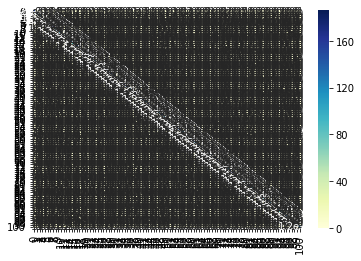

In [38]:
# display the confusion matrix
print ("[INFO] confusion matrix")

# get the list of training lables
labels = sorted(list(os.listdir(train_path)))

# plot the confusion matrix
cm = confusion_matrix(testLabels, preds)
sns.heatmap(cm,
            annot=True,
            cmap="YlGnBu",
            xticklabels=True,
            yticklabels= True)
plt.yticks(rotation=0)
plt.xticks(rotation=90) 
plt.savefig("H:/output/inceptionv3/confusionmatrix1.png")
plt.show()

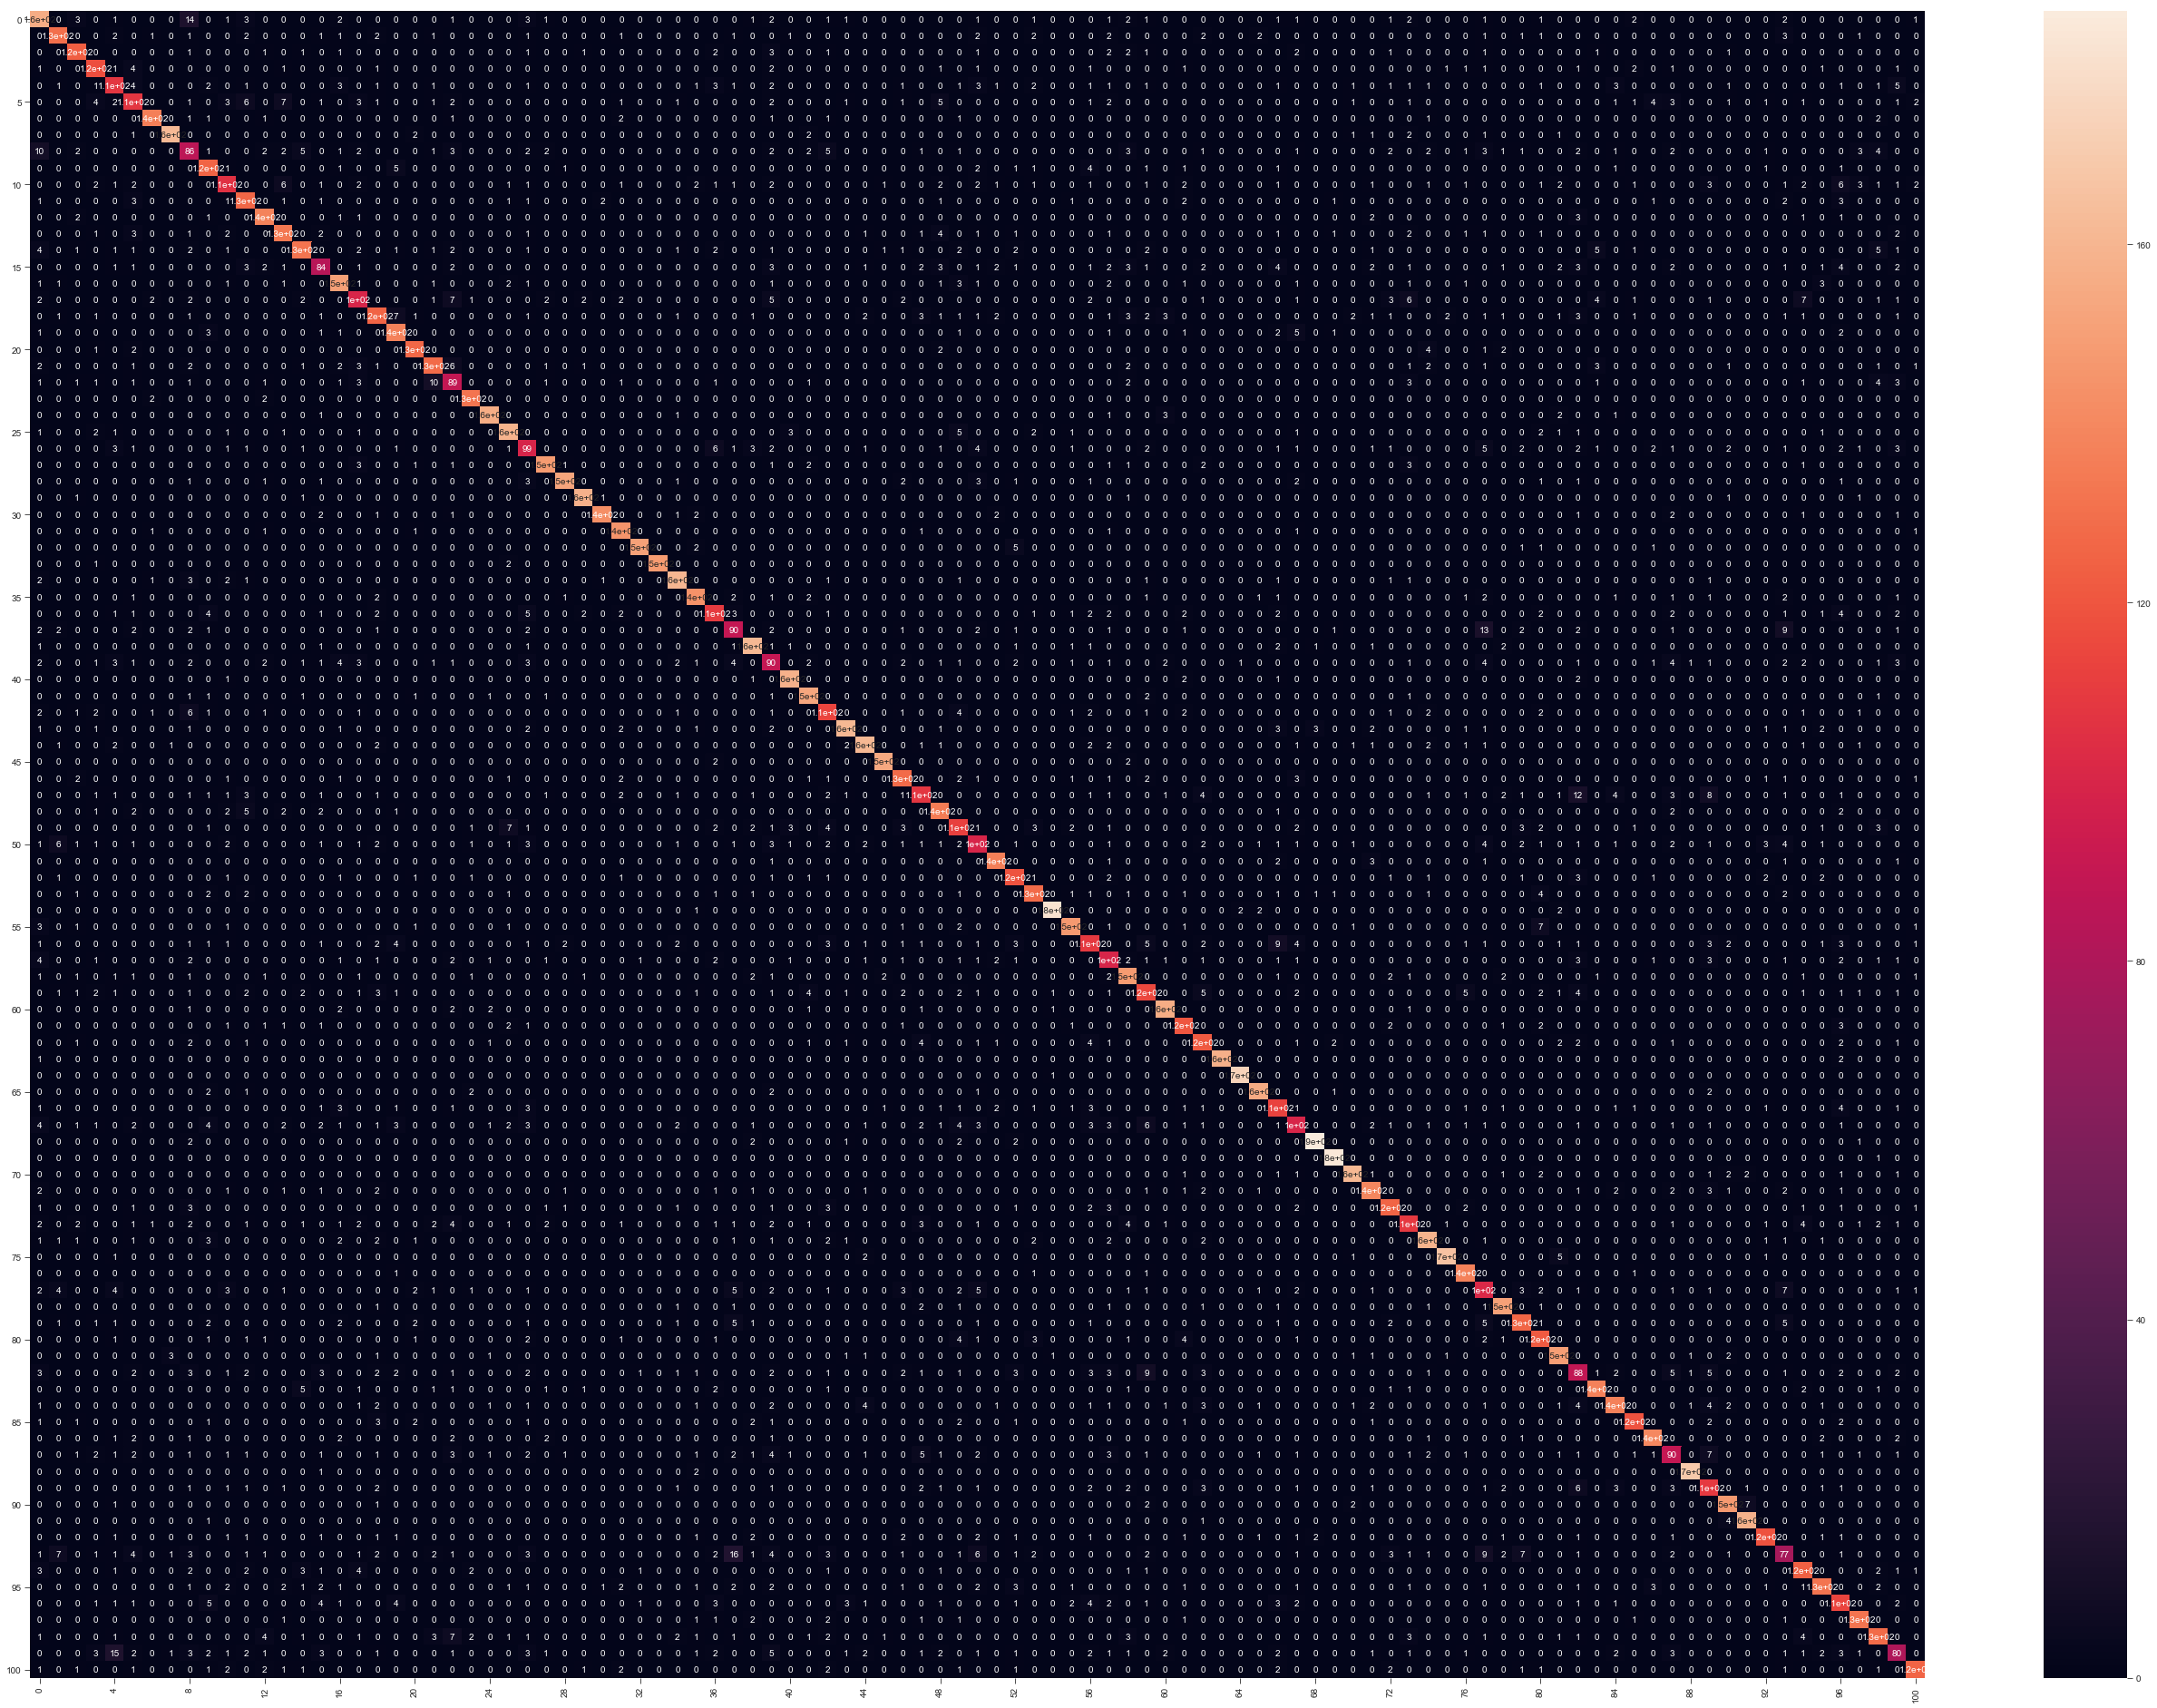

In [44]:
# plot the confusion matrix - increase the size of confustion matrix
cm1 = confusion_matrix(testLabels, preds)

sns.set_style('ticks')
fig, ax = plt.subplots()


sns.heatmap(cm1,
            annot=True) 
plt.savefig("H:/output/inceptionv3/confusionmatrix2.png")
fig.set_size_inches(46.8, 33.8)
plt.show()